# UNIT 2  GROUP WORK - Data Engineering for Health Data Science

#### Team Boolean members:
- Sol Andres
- Peter Edwards
- Kamal Masarweh
    

<a id="top"></a>

<b>Table of contents</b><br>

PART 1 -  [QUANTITIES](#quantity)

PART 2 - [COSTS](#cost)

PART 3 - [GEOGRAPHICAL DATA](#geographical)

In [10]:
# Settings

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # for creating graphs from 2 series

# script for changeing figure size & dpi
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True) ##To propagate the size change to an existing GUI window, add forward=True:
fig.set_dpi(100)

# read the CSV file
epd_20 = pd.read_csv('EPD_202004.csv')
epd_21 = pd.read_csv('EPD_202104.csv')

#epd_21


<Figure size 1000x400 with 0 Axes>

<a id="quantity"></a>
# Part 1 : QUANTITIES

In [13]:
# 2021 prescriptions overall quantity

drug_quantity_21 = epd_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
drug_quantity_sum_21 = drug_quantity_21.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["TOTAL_QUANTITY"].sum() #as_index needed to keep dataframe stucture
drug_quantity_sum_21

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
0,Absorbent Cottons,500.0
1,Acamprosate calcium,30802.0
2,Acarbose,1525.0
3,Acebutolol hydrochloride,350.0
4,Aceclofenac,636.0
...,...,...
1026,Zolpidem tartrate,9867.0
1027,Zonisamide,16040.0
1028,Zopiclone,77351.0
1029,Zuclopenthixol decanoate,250.0


In [17]:
# 2021 prescriptions  - 20 most prescribed 
drug_quantity_top_21=drug_quantity_sum_21.sort_values(by=['TOTAL_QUANTITY'],ascending=False)
drug_quantity_top_21.head(20)

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
329,Enteral nutrition,32284423.0
318,Emollients,6234276.0
712,Other emollient preparations,6186205.0
715,Other food for special diet preparations,4283227.0
29,Alginic acid compound preparations,2684629.0
716,Other food preparations,2413741.0
745,Paracetamol,2380118.0
211,Co-codamol (Codeine phosphate/paracetamol),1983418.0
609,Metformin hydrochloride,1911197.0
520,Lactulose,1550275.0


In [15]:
# 2020 prescriptions overall quantity

drug_quantity_20 = epd_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
drug_quantity_sum_20 = drug_quantity_20.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["TOTAL_QUANTITY"].sum()
drug_quantity_sum_20

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
0,Absorbent Cottons,1100.0
1,Acamprosate calcium,29523.0
2,Acarbose,1150.0
3,Acebutolol hydrochloride,238.0
4,Aceclofenac,456.0
...,...,...
1037,Zolpidem tartrate,10629.0
1038,Zonisamide,16119.0
1039,Zopiclone,82740.0
1040,Zuclopenthixol decanoate,140.0


In [18]:
# 2020 prescriptions  - 20 most prescribed 

drug_quantity_top_20=drug_quantity_sum_20.sort_values(by=['TOTAL_QUANTITY'],ascending=False)
drug_quantity_top_20.head(20)

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
338,Enteral nutrition,31437130.0
726,Other emollient preparations,5804050.0
329,Emollients,5604025.0
729,Other food for special diet preparations,4451878.0
758,Paracetamol,2593232.0
730,Other food preparations,2501411.5
27,Alginic acid compound preparations,2447949.0
215,Co-codamol (Codeine phosphate/paracetamol),1947588.0
624,Metformin hydrochloride,1834551.0
533,Lactulose,1556080.0


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

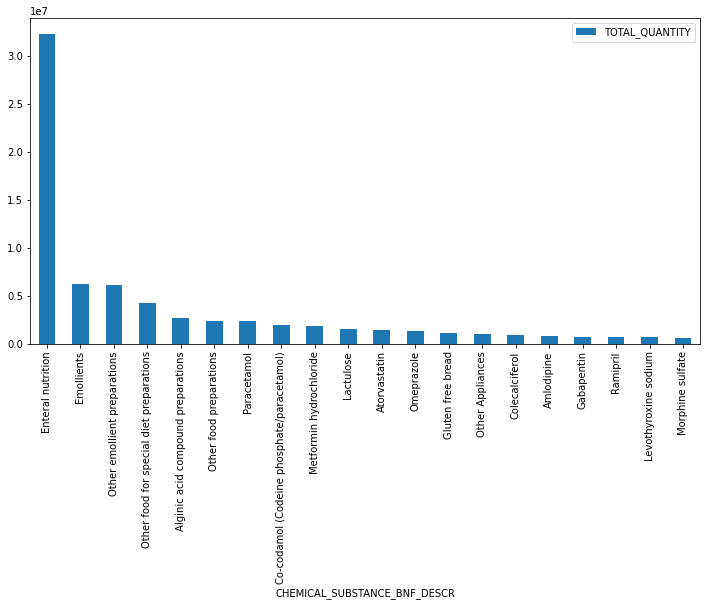

In [19]:
# Separate bar chart for most prescribed drugs 2021

drug_21_main=drug_quantity_top_21.head(20)
drug_21_main.plot.bar(x='CHEMICAL_SUBSTANCE_BNF_DESCR',y='TOTAL_QUANTITY',figsize=(12,6))

<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

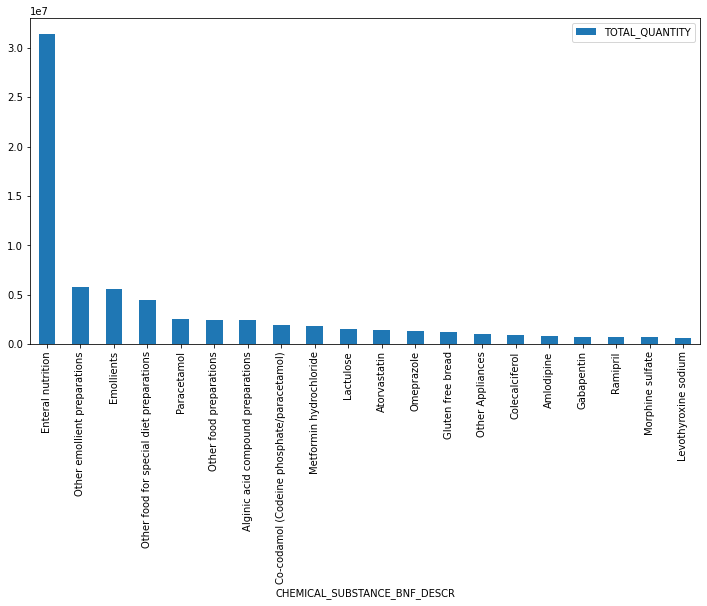

In [7]:
# Separate bar chart for most prescribed drugs 2020

drug_20_main=drug_quantity_top_20.head(20)
drug_20_main.plot.bar(x='CHEMICAL_SUBSTANCE_BNF_DESCR',y='TOTAL_QUANTITY',figsize=(12,6))

In [26]:
#drug_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(20) #values_reshape used to convert series to list for using in combined bar chart

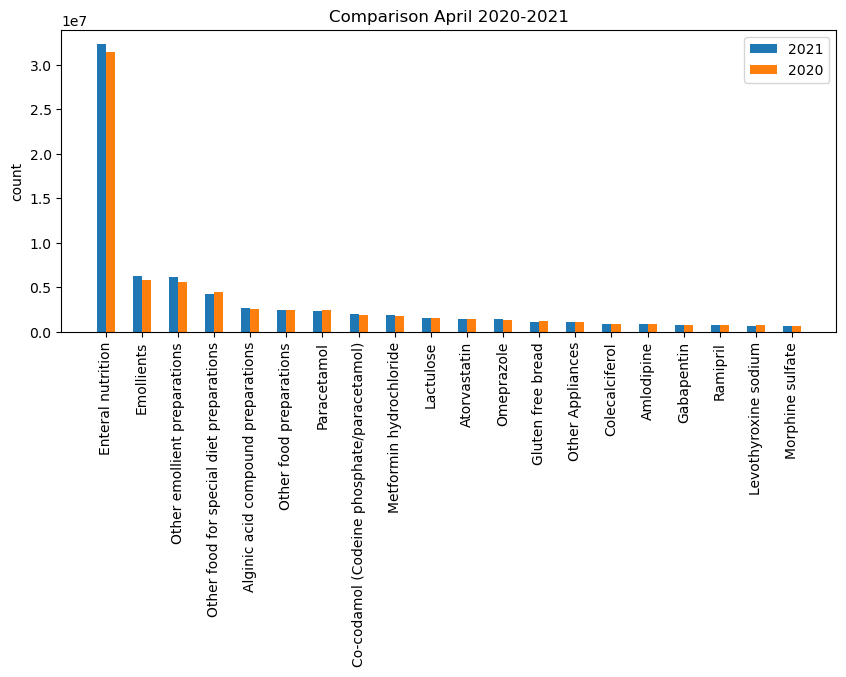

In [160]:
# comparison bar chart between two years - prescriptions

prescriptions_count = len(drug_21_main) 
x = np.arange(prescriptions_count)  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, drug_21_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2021') ## turn series to list
rects2 = ax.bar(x + width/2, drug_20_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2020')

#text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x)

x_axis = pd.Series(drug_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(prescriptions_count)) 

ax.set_xticklabels(x_axis, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)


In [162]:
drug_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(prescriptions_count)

array(['Enteral nutrition', 'Emollients', 'Other emollient preparations',
       'Other food for special diet preparations',
       'Alginic acid compound preparations', 'Other food preparations',
       'Paracetamol', 'Co-codamol (Codeine phosphate/paracetamol)',
       'Metformin hydrochloride', 'Lactulose', 'Atorvastatin',
       'Omeprazole', 'Gluten free bread', 'Other Appliances',
       'Colecalciferol', 'Amlodipine', 'Gabapentin', 'Ramipril',
       'Levothyroxine sodium', 'Morphine sulfate'], dtype=object)

In [46]:
# METHOD1 2021

# 2021 prescriptions by group (BNF_CHAPTER_PLUS_CODE)

drug_group_21 = epd_21["BNF_CHAPTER_PLUS_CODE"].value_counts()

# 2021 prescriptions - 10 most prescribed GROUPS
group_21_main = drug_group_21.head(10)
group_21_main

04: Central Nervous System                                 56409
02: Cardiovascular System                                  32331
06: Endocrine System                                       21260
01: Gastro-Intestinal System                               16416
09: Nutrition and Blood                                    16260
13: Skin                                                   13853
03: Respiratory System                                     12776
21: Appliances                                             11886
05: Infections                                              8513
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7630
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

In [45]:
# METHOD2 2021

# 2021 prescriptions by group - including calculation by TOTAL QUANTITY

drug_group_21 = epd_21[["BNF_CHAPTER_PLUS_CODE","TOTAL_QUANTITY"]]
drug_group_sum_21 = drug_group_21.groupby('BNF_CHAPTER_PLUS_CODE', as_index=False)["TOTAL_QUANTITY"].sum() 

# 2021 prescriptions - 10 most prescribed GROUPS by TOTAL QUANTITY

group_21_sum_main = drug_group_sum_21.head(10)
group_21_sum_main


,BNF_CHAPTER_PLUS_CODE,TOTAL_QUANTITY
0,01: Gastro-Intestinal System,8668543.0
1,02: Cardiovascular System,8566234.0
2,03: Respiratory System,1685408.0
3,04: Central Nervous System,13651930.4
4,05: Infections,1078985.5
5,06: Endocrine System,4724934.0
6,"07: Obstetrics, Gynaecology and Urinary-Tract ...",957917.0
7,08: Malignant Disease and Immunosuppression,101576.0
8,09: Nutrition and Blood,43517231.0
9,10: Musculoskeletal and Joint Diseases,2066979.0


In [47]:
# METHOD1 2020

# 2020 prescriptions by group (BNF_CHAPTER_PLUS_CODE)

drug_group_20 = epd_20["BNF_CHAPTER_PLUS_CODE"].value_counts()

#2020 prescriptions - 10 most prescribed GROUPS
group_20_main = drug_group_20.head(10)
group_20_main

04: Central Nervous System                                 54743
02: Cardiovascular System                                  32049
06: Endocrine System                                       20310
01: Gastro-Intestinal System                               15939
09: Nutrition and Blood                                    15866
03: Respiratory System                                     13242
13: Skin                                                   13058
21: Appliances                                             10852
05: Infections                                              8995
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7405
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

In [48]:
# METHOD2 2020

# 2020 prescriptions by group - including calculation by TOTAL QUANTITY

drug_group_20 = epd_20[["BNF_CHAPTER_PLUS_CODE","TOTAL_QUANTITY"]]
drug_group_sum_20 = drug_group_20.groupby('BNF_CHAPTER_PLUS_CODE', as_index=False)["TOTAL_QUANTITY"].sum() 
drug_group_sum_20

# 2020 prescriptions - 10 most prescribed GROUPS by TOTAL QUANTITY

group_20_sum_main = drug_group_sum_20.head(10)
group_21_sum_main


,BNF_CHAPTER_PLUS_CODE,TOTAL_QUANTITY
0,01: Gastro-Intestinal System,8668543.0
1,02: Cardiovascular System,8566234.0
2,03: Respiratory System,1685408.0
3,04: Central Nervous System,13651930.4
4,05: Infections,1078985.5
5,06: Endocrine System,4724934.0
6,"07: Obstetrics, Gynaecology and Urinary-Tract ...",957917.0
7,08: Malignant Disease and Immunosuppression,101576.0
8,09: Nutrition and Blood,43517231.0
9,10: Musculoskeletal and Joint Diseases,2066979.0


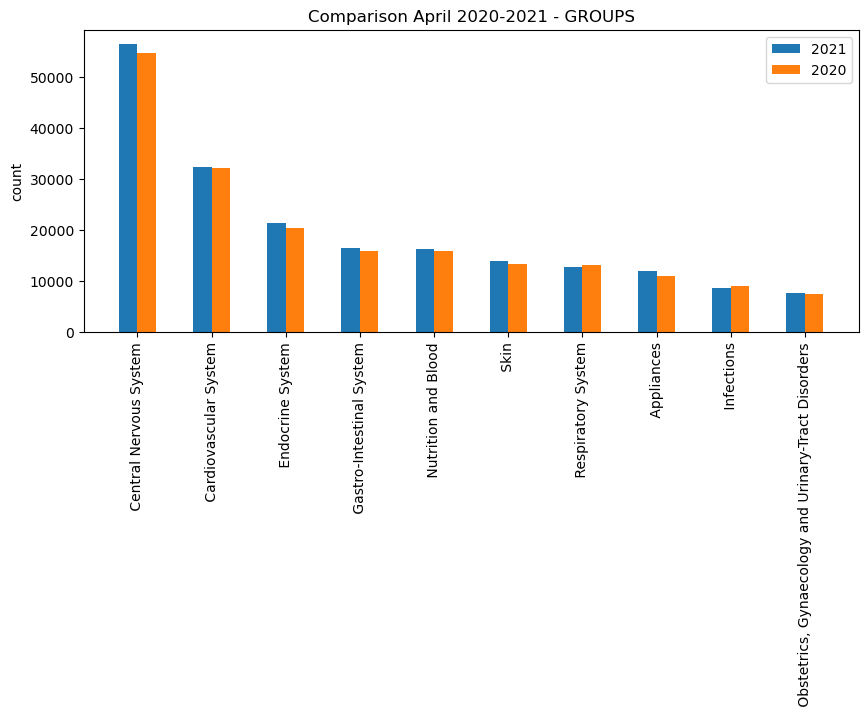

In [87]:
# comparison bar chart between two years - prescriptions as GROUPS (BNF_CHAPTER_PLUS_COD) - METHOD1

x = np.arange(len(group_21_main.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_21_main , width, label='2021')
rects2 = ax.bar(x + width/2, group_20_main , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - GROUPS')
ax.set_xticks(x)

second_word = pd.Series(group_21_main.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

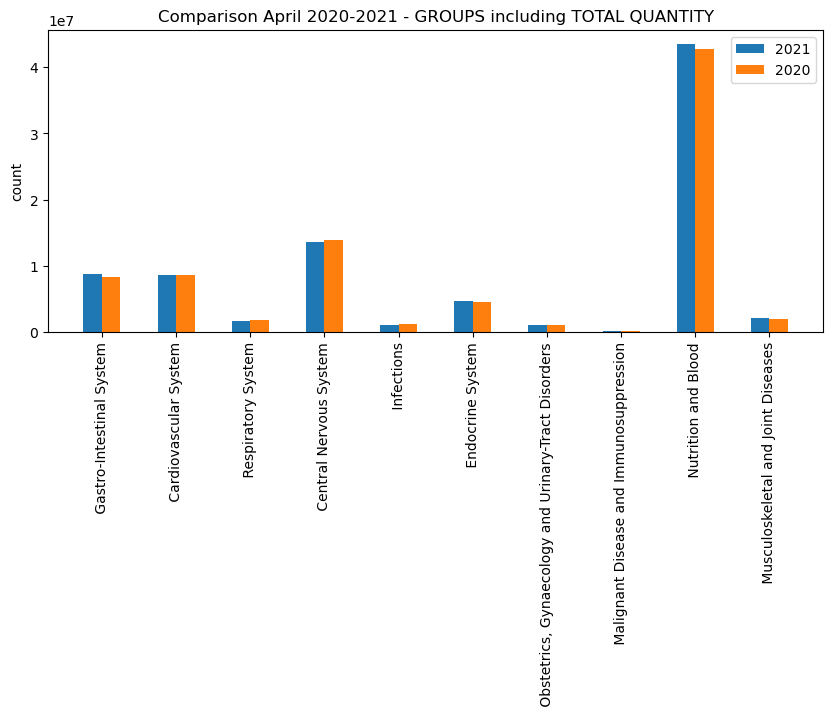

In [86]:
# comparison bar chart between two years - prescriptions as GROUPS including calculation by TOTAL QUANTITY - METHOD 2

prescriptions_count = len(group_21_sum_main) 
x = np.arange(prescriptions_count)  # the label locations
width = 0.25  # the width of the bars

#x = np.arange(len(group_21_sum_main.keys()))  # the label locations

_ , ax = plt.subplots()
#rects1 = ax.bar(x - width/2, group_21_sum_main , width, label='2021')
#rects2 = ax.bar(x + width/2, group_20_sum_main , width, label='2020')

rects1 = ax.bar(x - width/2, group_21_sum_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2021')
rects2 = ax.bar(x + width/2, group_20_sum_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - GROUPS including TOTAL QUANTITY')
ax.set_xticks(x)

second_word = pd.Series(group_21_sum_main[["BNF_CHAPTER_PLUS_CODE"]].values.reshape(prescriptions_count)) 
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

<a id="cost"></a>

## PART 2 - COSTS

In [149]:
## COSTS OF PRESCRIPTIONS

# 2021 total cost of presciptions
overall_cost_21 = epd_21['ACTUAL_COST'].sum()
# 2020 total cost of presciptions
overall_cost_20 = epd_20['ACTUAL_COST'].sum()


In [89]:
# 2021 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_21 = epd_21.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_cost_main_21=group_cost_21.head(15)
group_cost_main_21

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                33.155450
02: Cardiovascular System                                   31.427788
03: Respiratory System                                      73.143055
04: Central Nervous System                                  25.938845
05: Infections                                              20.338859
06: Endocrine System                                        65.187693
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     26.182677
08: Malignant Disease and Immunosuppression                 75.989270
09: Nutrition and Blood                                     45.553604
10: Musculoskeletal and Joint Diseases                      20.790925
11: Eye                                                     21.714533
12: Ear, Nose and Oropharynx                                28.464686
13: Skin                                                    24.216060
14: Immunological Products and Vaccines                    260.73079

In [90]:
# 2020 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_20 = epd_20.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_cost_main_20=group_cost_20.head(15)
group_cost_main_20

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                               29.393818
02: Cardiovascular System                                  28.543309
03: Respiratory System                                     73.115024
04: Central Nervous System                                 27.749504
05: Infections                                             20.131416
06: Endocrine System                                       64.654654
07: Obstetrics, Gynaecology and Urinary-Tract Disorders    26.282968
08: Malignant Disease and Immunosuppression                70.478257
09: Nutrition and Blood                                    45.682255
10: Musculoskeletal and Joint Diseases                     20.963553
11: Eye                                                    21.869329
12: Ear, Nose and Oropharynx                               28.845989
13: Skin                                                   23.395512
14: Immunological Products and Vaccines                    53.750129
15: Anaesthe

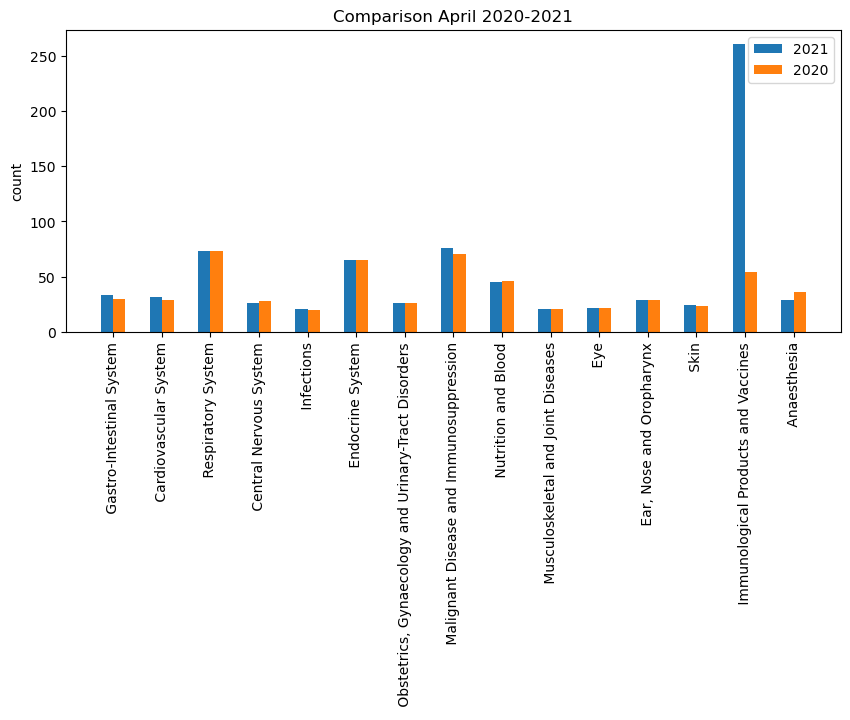

In [91]:
# comparison bar chart between two years - prescription costs of main 15 GROUPS (BNF_CHAPTER_PLUS_COD)

x = np.arange(len(group_cost_main_21.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_cost_main_21 , width, label='2021')
rects2 = ax.bar(x + width/2, group_cost_main_20 , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x,)
             
second_word = pd.Series(group_cost_main_21.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)
    
ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)

In [175]:
# trying to analyze the difference in cost in "14: Immunological Products and Vaccines"


In [ ]:


#METHOD 1 - using MEAN function



In [176]:
vaccines_cost_21_mean=vaccines_cost_21.groupby(["CHEMICAL_SUBSTANCE_BNF_DESCR"]).mean()
vaccines_cost_21_mean

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Diphtheria,9.908025
Hepatitis A,28.414159
Hepatitis A/hepatitis B,108.598615
Hepatitis A/typhoid vaccine,66.614970
Hepatitis B,38.813369
"Human papillomavirus (Type 6,11,16,18)",443.121835
Influenza,1468.270725
Meningococcal A + C + W135 + Y vaccine,55.885045
Pneumococcal,63.309258


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

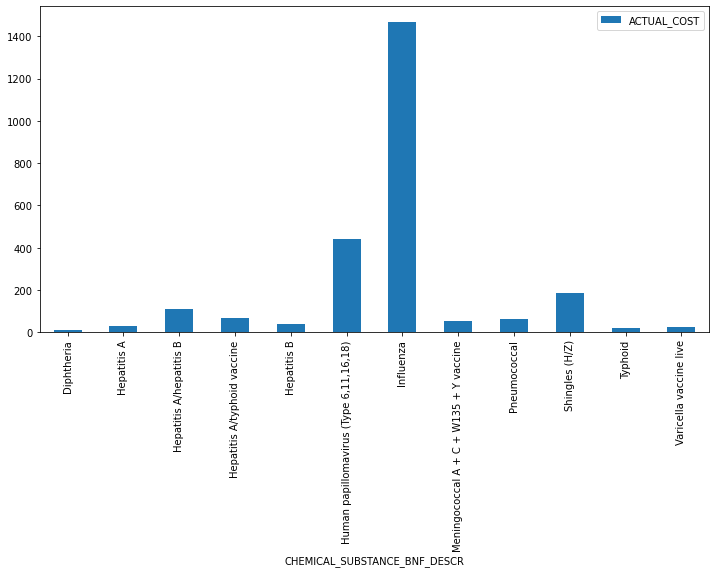

In [177]:
vaccines_cost_21_mean.plot.bar(figsize=(12,6))

In [178]:
vaccines_20 = epd_20.loc[epd_20["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']

vaccines_cost_20 = vaccines_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]

In [179]:
vaccines_cost_20_mean=vaccines_cost_20.groupby(["CHEMICAL_SUBSTANCE_BNF_DESCR"]).mean()
vaccines_cost_20_mean

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Diphtheria,15.319871
Hepatitis A,96.773728
Hepatitis A/hepatitis B,38.652000
Hepatitis A/typhoid vaccine,138.507648
Hepatitis B,20.729385
Influenza,94.380929
"Measles, mumps and rubella vaccine",7.126800
Meningococcal A + C + W135 + Y vaccine,27.887450
Pneumococcal,48.762932


<AxesSubplot:xlabel='CHEMICAL_SUBSTANCE_BNF_DESCR'>

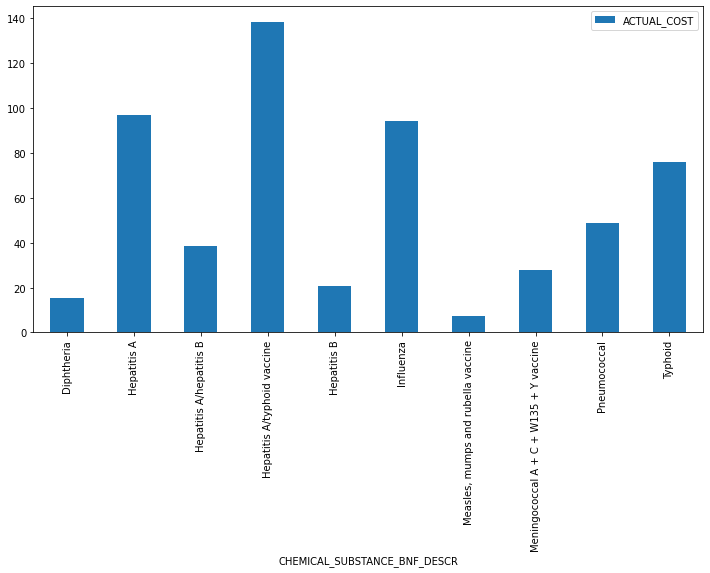

In [180]:
vaccines_cost_20_mean.plot.bar(figsize=(12,6))

In [ ]:


# METHOD 2 - using sum of ACTUAL_COST calculation



In [182]:
# 2021 vaccines SUM costs

vaccines_21 = epd_21.loc[epd_21["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']
vaccines_cost_21=vaccines_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]
vaccines_cost_sum_21 = vaccines_cost_21.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["ACTUAL_COST"].sum()

# 2021 vaccines - 20 highest cost 
vaccines_cost_top_21=vaccines_cost_sum_21.sort_values(by=['ACTUAL_COST'],ascending=False)
vaccines_cost_top_21.head(20)


,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
6,Influenza,27897.14378
8,Pneumococcal,2405.75182
4,Hepatitis B,1397.28130
5,"Human papillomavirus (Type 6,11,16,18)",886.24367
9,Shingles (H/Z),372.44273
1,Hepatitis A,312.55575
2,Hepatitis A/hepatitis B,217.19723
7,Meningococcal A + C + W135 + Y vaccine,111.77009
0,Diphtheria,108.98827
10,Typhoid,93.55157


In [181]:
# 2020 vaccines SUM costs

vaccines_20 = epd_20.loc[epd_20["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']
vaccines_cost_20=vaccines_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]
vaccines_cost_sum_20 = vaccines_cost_20.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["ACTUAL_COST"].sum()

# 202 vaccines - 20 highest cost
vaccines_cost_top_20=vaccines_cost_sum_20.sort_values(by=['ACTUAL_COST'],ascending=False)
vaccines_cost_top_20.head(20)


,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
5,Influenza,1698.85673
8,Pneumococcal,1657.93970
1,Hepatitis A,1258.05847
3,Hepatitis A/typhoid vaccine,831.04589
9,Typhoid,684.69258
4,Hepatitis B,684.06972
0,Diphtheria,260.43781
2,Hepatitis A/hepatitis B,38.65200
7,Meningococcal A + C + W135 + Y vaccine,27.88745
6,"Measles, mumps and rubella vaccine",7.12680


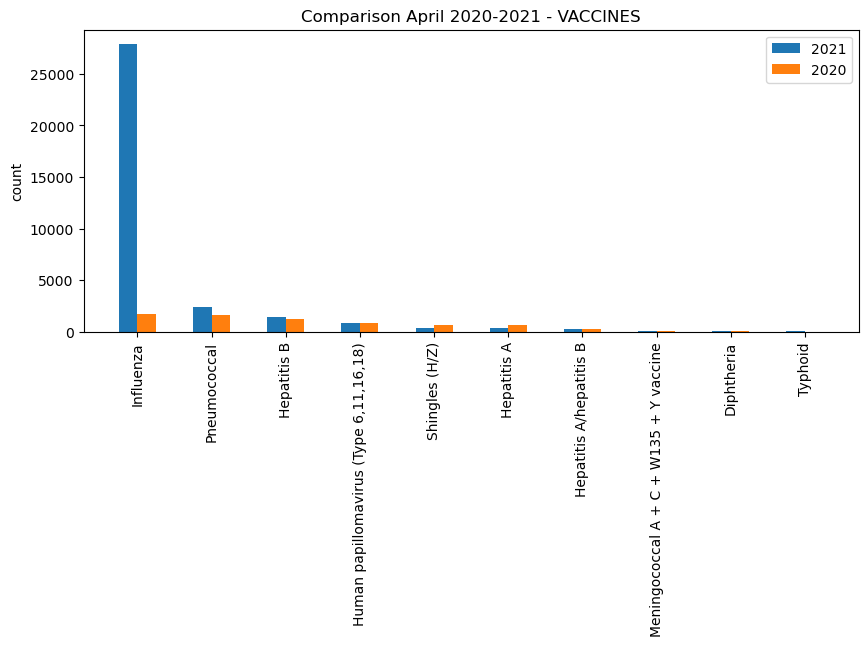

In [189]:
# comparison bar chart between two years - VACCINES COSTS

vaccines_21_main = vaccines_cost_top_21.head(10)
vaccines_20_main = vaccines_cost_top_20.head(10)

vaccines_count = len(vaccines_21_main)
x = np.arange(vaccines_count)  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, vaccines_21_main[["ACTUAL_COST"]].values.reshape(vaccines_count), width, label='2021')
rects2 = ax.bar(x + width/2, vaccines_20_main[["ACTUAL_COST"]].values.reshape(vaccines_count), width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - VACCINES')
ax.set_xticks(x)

#second_word = pd.Series(group_21_sum_main[["BNF_CHAPTER_PLUS_CODE"]].values.reshape(prescriptions_count)) 
#second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

#x_axis = pd.Series(group_cost_main_21.keys().tolist())
#values.reshape(prescriptions_count)) 
x_axis= pd.Series(vaccines_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(vaccines_count)) 
ax.set_xticklabels(x_axis, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True)
fig.set_dpi(100)


<a id="geographical"></a>

## PART 3 - GEOGRAPHICAL DATA

In [119]:
# Unit 2 Section 4 assessment
# How to read csv file
# import the pandas library as pd for short hand
import pandas as pd
# read the CSV file
epd_20 = pd.read_csv('/Users/mariasolandres/project/EPD_202004.csv')
epd_21 = pd.read_csv('/Users/mariasolandres/project/EPD_202104 (1).csv')
# displaying the contents of the CSV file - this will take a few seconds.
#print(epd_20)
#print(epd_21)
# check that a data frame has been created for each epd dataset
#type(epd_20)
#type(epd_21)

# read in the second EDP file as above
# you are now ready to explore the data


In [144]:
practices = epd_20["PRACTICE_NAME"]
practices.describe()
GP_practices_20 = len(practices.unique())

In [148]:
practices21 = epd_21["PRACTICE_NAME"]
practices21.describe()
GP_practices_21 = len(practices21.unique())

In [149]:
Practices_dataframe = pd.DataFrame(
    {
        "Month": [
            "April",
            "April",
        ],
        "Year": [2020, 2021],
        "Number of Practices": [GP_practices_20, GP_practices_21],
    }
)

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

Practices_dataframe

,Month,Year,Number of Practices
0,April,2020,114
1,April,2021,116


Text(0.5, 1.0, 'GP practices per year')

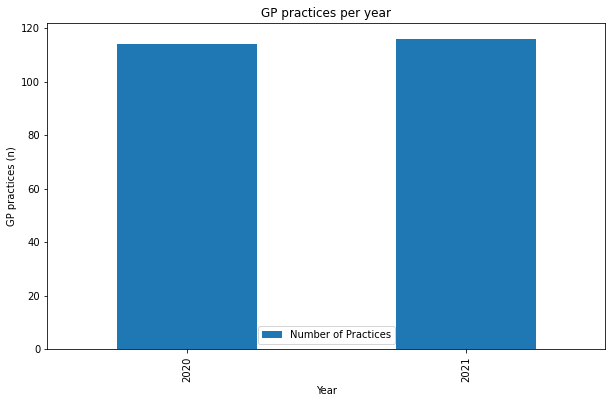

In [151]:
fig, axs = plt.subplots(figsize=(10, 6))        
Practices_dataframe.plot.bar(ax=axs, x="Year", y="Number of Practices")            
axs.set_ylabel("GP practices (n)")  
axs.set_xlabel("Year")             
axs.set_title ("GP practices per year") 
   

In [153]:
difference_in_practices = GP_practices_21 - GP_practices_20
print(f"There are {difference_in_practices} more GP practices in April 2021 compared to April 2020")
print(f"This corresponds to the {(100 - (GP_practices_20 / GP_practices_21) * 100)}%")

There are 2 more GP practices in April 2021 compared to April 2020
This corresponds to the 1.724137931034491%


In [154]:
prescriptions_20 = epd_20["BNF_DESCRIPTION"]
prescriptions_21 = epd_21["BNF_DESCRIPTION"]

#print(prescriptions_20.describe())
#print(prescriptions_20.count())
prescr_20_count = prescriptions_20.count()
prescr_20_unique = len(prescriptions_20.unique())

print(prescriptions_21.describe())
prescr_21_count = prescriptions_21.count()
prescr_21_unique = len(prescriptions_21.unique())

count                        221428
unique                         7576
top       Paracetamol 500mg tablets
freq                           1063
Name: BNF_DESCRIPTION, dtype: object


,Year,Number of Practices,Number of Prescriptions,Unique Prescriptions
0,2020,114,216319,7625
1,2021,116,221428,7576


<AxesSubplot:xlabel='Year'>

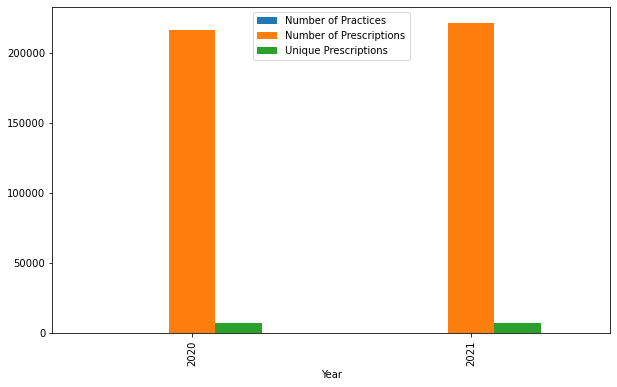

In [155]:
prescriptions_dataframe = pd.DataFrame(
    {
        "Year": [
            "2020",
            "2021",
        ],
        "Number of Practices": [GP_practices_20, GP_practices_21],
        "Number of Prescriptions": [prescr_20_count, prescr_21_count],
        "Unique Prescriptions": [prescr_20_unique, prescr_21_unique]
    }
)
display(prescriptions_dataframe)

fig, axs = plt.subplots(figsize=(10, 6))        
prescriptions_dataframe.plot.bar(ax=axs, x="Year")            

In [156]:
difference_in_prescriptions = prescr_21_count - prescr_20_count
difference_in_unique_prescriptions = prescr_21_unique - prescr_20_unique
Average_total = (100 - (prescr_20_count / prescr_21_count) * 100)
Average_unique = (100 - (prescr_20_unique / prescr_21_unique) * 100)
print(f"There were {difference_in_prescriptions} more prescriptions done in April 2021 compared to April 2020")
print(f"This corresponds to an increase of {Average_total}% of total prescriptions made in 2021 comapred to 2020")
print(f"This shows a reduction by {Average_unique}% of unique prescriptions made in 2021 compared to 2020")

There were 5109 more prescriptions done in April 2021 compared to April 2020
This corresponds to an increase of 2.3072962768936236% of total prescriptions made in 2021 comapred to 2020
This shows a reduction by -0.6467793030622886% of unique prescriptions made in 2021 compared to 2020


# REGIONS

The different areas (ADDRESS_3) where grouped according to their geographical region in 8 different groups: Central, North, East, West, NE, NW, SE, SW. Number of practices, of prescriptions made and of actual costs were compared among regions and years. This was plotted first in seperate bar graphs per year and finally in a joint graph comparing the information between the two periods of time that are being analised.

In [12]:
Regions_Practices= epd_20[["ADDRESS_3", "PRACTICE_NAME"]]
Regions_Practices.describe()

,ADDRESS_3,PRACTICE_NAME
count,215625,216319
unique,24,114
top,MANCHESTER,BENCHILL MEDICAL PRACTICE
freq,132188,3981


In [167]:
Regions_central = epd_20[epd_20["ADDRESS_3"] == "MANCHESTER"]
#print(Regions_central.describe())
#CENTRAL = 132188
CENTRAL = Regions_central["BNF_DESCRIPTION"].count()
print(f"The practices in the Central region made {CENTRAL} total prescriptions in April 2020")

The practices in the Central region made 132188 total prescriptions in April 2020


In [170]:
Regions_north = epd_20[(epd_20["ADDRESS_3"] == 
                                      "CRUMPSALL") | (epd_20["ADDRESS_3"] 
                                                      == "CHEETHAM") | (epd_20["ADDRESS_3"] 
                                                                        == "CHEETHAM HILL")]
Regions_north.describe()
NORTH = Regions_north["BNF_DESCRIPTION"].count()
#NORTH = 8175
print(f"The practices in the Northern region made {NORTH} total prescriptions in April 2020")

The practices in the Northern region made 8175 total prescriptions in April 2020


In [171]:
Regions_west = epd_20[(epd_20["ADDRESS_3"] == "ST HELENS")]
Regions_west.describe()
WEST = Regions_west["BNF_DESCRIPTION"].count()
#WEST = 3
print(f"The practices in the Western region made {WEST} total prescriptions in April 2020")

The practices in the Western region made 3 total prescriptions in April 2020


In [172]:
Regions_SW = epd_20[(epd_20["ADDRESS_3"] == "SALE")| (epd_20["ADDRESS_3"] == "CHORLTON-CUM-HARDY")]
Regions_SW.describe()
SW = Regions_SW["BNF_DESCRIPTION"].count()
#SW = 7066
print(f"The practices in the South West region made {SW} total prescriptions in April 2020")

The practices in the South West region made 7066 total prescriptions in April 2020


In [173]:
Regions_south = epd_20[epd_20["ADDRESS_3"].isin (["HULME, MANCHESTER", "WALMER STREET,RUSHOLME", 
                                                               "WHALLEY RANGE", "WHALLEY RANGE,MANCHESTER", 
                                                               "NORTHENDEN", "NORTHERN MOOR", "BAGULEY",
                                                                "WITHINGTON",
                                                                "WYTHENSHAWE"])]
Regions_south.describe()
SOUTH = Regions_south["BNF_DESCRIPTION"].count()
#SOUTH = 32644
print(f"The practices in the South region made {SOUTH} total prescriptions in April 2020")


The practices in the South region made 32644 total prescriptions in April 2020


In [174]:
Regions_SE = epd_20[epd_20["ADDRESS_3"].isin (["VICTORIA PARK", "FALLOWFIELD", 
                                                               "LONGSIGHT", "LEVENSHULME" 
                                                               ])]
Regions_SE.describe()
SE = Regions_SE["BNF_DESCRIPTION"].count()
#SE = 20533
print(f"The practices in the South East region made {SE} total prescriptions in April 2020")

The practices in the South East region made 20533 total prescriptions in April 2020


In [175]:
Regions_NE = epd_20[epd_20["ADDRESS_3"].isin (["BLACKLEY", "COLLYHURST", 
                                                               "NEW MOSTON,MANCHESTER", "NEWTON HEATH" 
                                                               ])]
Regions_NE.describe()
NE = Regions_NE["BNF_DESCRIPTION"].count()
#NE = 9263
print(f"The practices in the North East region made {NE} total prescriptions in April 2020")

The practices in the North East region made 9263 total prescriptions in April 2020


In [176]:
regions_dataframe_20 = pd.DataFrame(
    {
        "Regions": [
            "CENTRAL",
            "NORTH",
            "NE",
            "WEST",
            "SW",
            "SOUTH",
            "SE",
            ],
        "Number of Prescriptions": [CENTRAL, NORTH, NE, WEST, SW, SOUTH, SE]
    }
)

regions_dataframe_20

,Regions,Number of Prescriptions
0,CENTRAL,132188
1,NORTH,8175
2,NE,9263
3,WEST,3
4,SW,7066
5,SOUTH,32644
6,SE,20533


Text(0.5, 1.0, 'Total number of prescriptions done per region, April 2020')

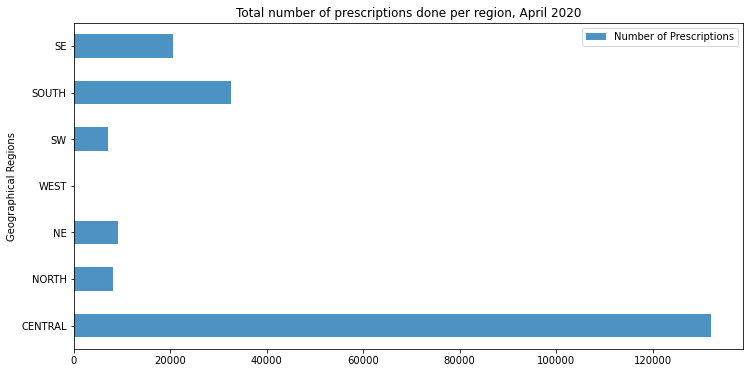

In [177]:
#How to plot and customize a horitzontal bar graph

fig, axs = plt.subplots(figsize=(12, 6))  
regions_dataframe_20.plot.barh(ax=axs, x="Regions", y="Number of Prescriptions", alpha=0.8)           
axs.set_ylabel("Geographical Regions")            
axs.set_title ("Total number of prescriptions done per region, April 2020") 
#fig.savefig("num_prescriptions20.png")

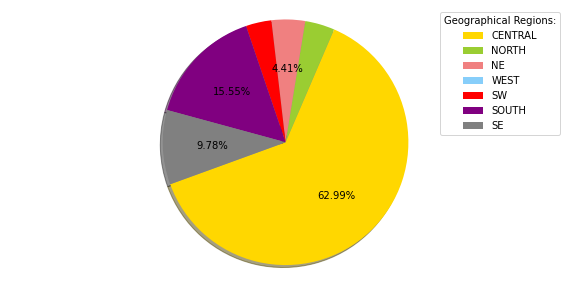

In [180]:
#HOW TO PLOT A PIE CHART


def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = "CENTRAL", "NORTH", "NE", "WEST", "SW", "SOUTH", "SE"
#sizes = [132188, 8175, 9263, 3, 7066, 32644, 20533]
sizes = [CENTRAL, NORTH, NE, WEST, SW, SOUTH, SE]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'purple', 'grey']
explode = (0, 0, 0, 0, 0, 0, 0)  # explode no slice

fig1, ax1 = plt.subplots(figsize=(10, 5)) #changes size of the pie chart

# Plot
plt.pie(sizes, explode=explode, colors=colors,
autopct=autopct_generator(4), shadow=True, startangle=200)
plt.legend(labels, title = "Geographical Regions:") #puts the labels as legend instead of around the chart
#fig1, ax1 = plt.subplots(figsize=(6, 5)
plt.axis('equal')
plt.show()


In [181]:
##SELECTION STATEMENT

ADDRESS_3 = str(input("Where do you live?"))

if ADDRESS_3 == "MANCHESTER":
    print("This belongs to Central region")
elif ADDRESS_3 == "CRUMPSALL" or ADDRESS_3 == "CHEETHAM" or ADDRESS_3 == "CHEETHAM HILL":
    print("This belongs to North region")
elif ADDRESS_3 == "ST HELENS":
    print("This belongs to West region")
elif ADDRESS_3 == "SALE" or ADDRESS_3 == "CHORLTON-CUM-HARDY":
    print("This belongs to SW region")
elif ADDRESS_3 == "VICTORIA PARK" or ADDRESS_3 == "FALLOWFIELD" or ADDRESS_3 == "LONGSIGHT" or ADDRESS_3 == "LEVENSHULME":
    print("This belongs to SE region")
elif ADDRESS_3 == "BLACKLEY" or ADDRESS_3 == "COLLYHURST" or ADDRESS_3 == "NEW MOSTON,MANCHESTER" or ADDRESS_3 == "NEWTON HEATH":
    print("This belongs to NE region")
elif ADDRESS_3 == "HULME, MANCHESTER" or ADDRESS_3 == "WALMER STREET,RUSHOLME" or ADDRESS_3 == "WHALLEY RANGE"or ADDRESS_3 == "WHALLEY RANGE,MANCHESTER" or ADDRESS_3 == "NORTHENDEN" or ADDRESS_3 == "NORTHERN MOOR" or ADDRESS_3 == "BAGULEY" or ADDRESS_3 == "WITHINGTON" or ADDRESS_3 == "WYTHENSHAWE":
    print("This belongs to South region")
else:
    print("You've entered an invalid name")


Where do you live?WHALLEY RANGE
This belongs to South region


In [182]:
Regions_central21 = epd_21[epd_21["ADDRESS_3"] == "MANCHESTER"]
Regions_central21.describe()
CENTRAL21 = Regions_central21["BNF_DESCRIPTION"].count()
#CENTRAL21 = 135716

In [183]:
Regions_north21 = epd_21[(epd_21["ADDRESS_3"] == "CRUMPSALL") | 
                                       (epd_20["ADDRESS_3"] == "CHEETHAM") | 
                                       (epd_20["ADDRESS_3"] == "CHEETHAM HILL")]
Regions_north21.describe()
NORTH21 = Regions_north21["BNF_DESCRIPTION"].count()
#NORTH21 = 8058

In [184]:
Regions_west21 = epd_21[epd_21["ADDRESS_3"].isin (["LEIGH", "WINWICK"])]
Regions_west21.describe()
WEST21 = Regions_west21["BNF_DESCRIPTION"].count()
#WEST21 = 135

In [185]:
Regions_SW21 = epd_21[(epd_21["ADDRESS_3"] == "SALE")| (epd_20["ADDRESS_3"] == 
                                                                      "CHORLTON-CUM-HARDY") | 
                                   (epd_20["ADDRESS_3"] == "PRESCOT")]
Regions_SW21.describe()
SW21 = Regions_SW21["BNF_DESCRIPTION"].count()
#SW21 = 7051

In [186]:
Regions_south21 = epd_21[epd_21["ADDRESS_3"].isin (["HULME, MANCHESTER", "WALMER STREET,RUSHOLME", 
                                                               "WHALLEY RANGE", "WHALLEY RANGE,MANCHESTER", 
                                                               "NORTHENDEN", "NORTHERN MOOR", "BAGULEY", 
                                                                  "WITHINGTON",
                                                                "WYTHENSHAWE"])]
Regions_south21.describe()
SOUTH21 = Regions_south21["BNF_DESCRIPTION"].count()
#SOUTH21 = 32743

In [187]:
Regions_SE21 = epd_21[epd_21["ADDRESS_3"].isin (["VICTORIA PARK", "FALLOWFIELD", 
                                                               "LONGSIGHT", "LEVENSHULME" 
                                                               ])]
Regions_SE21.describe()
SE21 = Regions_SE21["BNF_DESCRIPTION"].count()
#SE21 = 21390

In [188]:
Regions_NE21 = epd_21[epd_21["ADDRESS_3"].isin (["BLACKLEY", "COLLYHURST", 
                                                               "NEW MOSTON,MANCHESTER", "NEWTON HEATH" 
                                                               ])]
Regions_NE21.describe()
NE21 = Regions_NE21["BNF_DESCRIPTION"].count()
#NE21 = 9402

In [189]:
Regions_NW21 = epd_21[(epd_21["ADDRESS_3"] == "WIGAN")]
Regions_NW21.describe()
NW21 = Regions_NW21["BNF_DESCRIPTION"].count()
#NW21 = 202

In [190]:
print(f"The practices in the Central region made {CENTRAL21} total prescriptions in April 2021")
print(f"The practices in the Northern region made {NORTH21} total prescriptions in April 2021")
print(f"The practices in the North East region made {NE21} total prescriptions in April 2021")
print(f"The practices in the Western region made {WEST21} total prescriptions in April 2021")
print(f"The practices in the South West region made {SW21} total prescriptions in April 2021")
print(f"The practices in the South region made {SOUTH21} total prescriptions in April 2021")
print(f"The practices in the South East region made {SE21} total prescriptions in April 2021")
print(f"The practices in the North West region made {NW21} total prescriptions in April 2021")


The practices in the Central region made 135716 total prescriptions in April 2021
The practices in the Northern region made 8058 total prescriptions in April 2021
The practices in the North East region made 9402 total prescriptions in April 2021
The practices in the Western region made 135 total prescriptions in April 2021
The practices in the South West region made 7051 total prescriptions in April 2021
The practices in the South region made 32743 total prescriptions in April 2021
The practices in the South East region made 21390 total prescriptions in April 2021
The practices in the North West region made 202 total prescriptions in April 2021


In [191]:
regions_dataframe_21 = pd.DataFrame(
    {
        "Regions": [
            "CENTRAL21",
            "NORTH21",
            "NE21",
            "WEST21",
            "SW21",
            "SOUTH21",
            "SE21",
            "NW21",
            ],
        "Number of Prescriptions": [CENTRAL21, NORTH21, NE21, WEST21, SW21, SOUTH21, SE21, NW21]
    }
)

regions_dataframe_21

,Regions,Number of Prescriptions
0,CENTRAL21,135716
1,NORTH21,8058
2,NE21,9402
3,WEST21,135
4,SW21,7051
5,SOUTH21,32743
6,SE21,21390
7,NW21,202


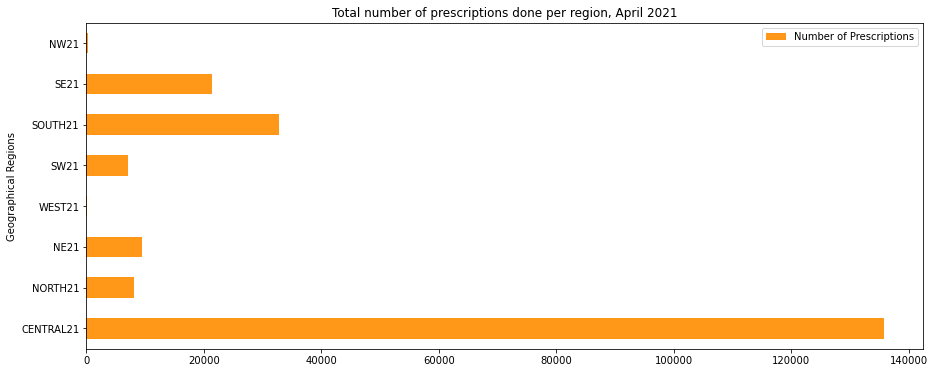

In [192]:
#regions_dataframe_21.plot.barh(x="Regions", y="Number of Prescriptions", alpha=0.9)

fig, axs = plt.subplots(figsize=(15, 6))  
regions_dataframe_21.plot.barh(ax=axs, x="Regions", y="Number of Prescriptions", color = "darkorange", alpha=0.9)           
axs.set_ylabel("Geographical Regions")            
axs.set_title ("Total number of prescriptions done per region, April 2021") 
fig.savefig("num_prescriptions21.png")

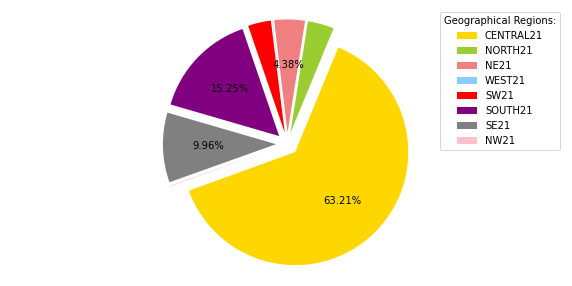

In [193]:
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = "CENTRAL21", "NORTH21", "NE21", "WEST21", "SW21", "SOUTH21", "SE21", "NW21"
#sizes = [135716, 8058, 9402, 135, 7051, 32743, 21390, 202]
sizes = [CENTRAL21, NORTH21, NE21, WEST21, SW21, SOUTH21, SE21, NW21]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'purple', 'grey', 'pink']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots(figsize=(10, 5)) #changes size of the pie chart

# Plot
plt.pie(sizes, explode=explode, colors=colors,
autopct=autopct_generator(4), shadow=False, startangle=200)
plt.legend(labels, title = "Geographical Regions:") #puts the labels as legend instead of around the chart
#fig1, ax1 = plt.subplots(figsize=(6, 5)
plt.axis('equal')
plt.show()


In [194]:
ADDRESS_3_21 = str(input("What is your address?"))

if ADDRESS_3_21 == "MANCHESTER":
    print("This belongs to Central region")
elif ADDRESS_3_21 == "CRUMPSALL" or ADDRESS_3_21 == "CHEETHAM" or ADDRESS_3_21 == "CHEETHAM HILL":
    print("This belongs to North region")
elif ADDRESS_3_21 == "LEIGH" or ADDRESS_3_21 == "WINWICK":
    print("This belongs to West region")
elif ADDRESS_3_21 == "SALE" or ADDRESS_3_21 == "CHORLTON-CUM-HARDY" or ADDRESS_3_21 == "PRESCOT":
    print("This belongs to SW region")
elif ADDRESS_3_21 == "VICTORIA PARK" or ADDRESS_3_21 == "FALLOWFIELD" or ADDRESS_3_21 == "LONGSIGHT" or ADDRESS_3_21 == "LEVENSHULME":
    print("This belongs to SE region")
elif ADDRESS_3_21 == "BLACKLEY" or ADDRESS_3_21 == "COLLYHURST" or ADDRESS_3_21 == "NEW MOSTON,MANCHESTER" or ADDRESS_3_21 == "NEWTON HEATH":
    print("This belongs to NE region")
elif ADDRESS_3_21 == "HULME, MANCHESTER" or ADDRESS_3_21 == "WALMER STREET,RUSHOLME" or ADDRESS_3_21 == "WHALLEY RANGE" or ADDRESS_3_21 == "WHALLEY RANGE,MANCHESTER" or ADDRESS_3_21 == "NORTHENDEN" or ADDRESS_3_21 == "NORTHERN MOOR" or ADDRESS_3_21 == "BAGULEY" or ADDRESS_3_21 == "WITHINGTON" or ADDRESS_3_21 == "WYTHENSHAWE":
    print("This belongs to South region")
elif ADDRESS_3_21 == "WIGAN":
    print("This belongs to NW region")
else:
    print("You've entered an invalid name")
    
    

What is your address?LONDON
You've entered an invalid name


# Comparison bar chart between the two years - prescriptions
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py




In [52]:
import matplotlib.pyplot as plt
import numpy as np

In [197]:
labels = ['CENTRAL', 'NORTH', 'NE', 'WEST', 'SW', 'SOUTH', 'SE', 'NW']
prescriptions_count_2020 = [CENTRAL, NORTH, NE, WEST, SW, SOUTH, SE, 0]
prescriptions_count_2021 = [CENTRAL21, NORTH21, NE21, WEST21, SW21, SOUTH21, SE21, NW21]
#prescriptions_count_2020 = [132188, 8175, 9263, 3, 7066, 32644, 20533, 0]
#prescriptions_count_2021 = [135716, 8058, 9402, 135, 7051, 32743, 21390, 202]

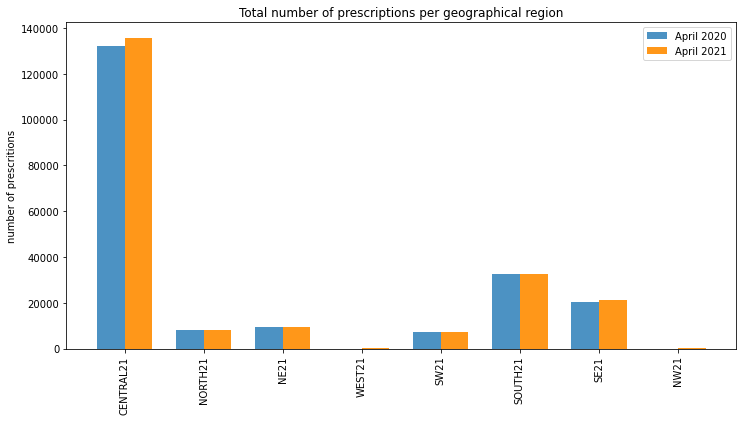

In [198]:
x = np.arange(len(regions_dataframe_21["Regions"]))  # the label locations
#x = np.arange(len(labels.keys()))
width = 0.35  # the width of the bars

_ , ax = plt.subplots(figsize=(12, 6))
#fig, axs = plt.subplots(figsize=(12, 6))  
rects1 = ax.bar(x - width/2, prescriptions_count_2020, width, label='April 2020', alpha=0.8)
rects2 = ax.bar(x + width/2, prescriptions_count_2021, width, label='April 2021', color = "darkorange", alpha=0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of prescritions')
ax.set_title('Total number of prescriptions per geographical region')
ax.set_xticks(x)
ax.legend()

first_word = pd.Series(regions_dataframe_21["Regions"].tolist()) ## turn series to list
first = first_word.str.split(' ').str[0] ## get 1st word from list for the x axis legend

ax.set_xticklabels(first, rotation=90)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

#from matplotlib.pyplot import figure


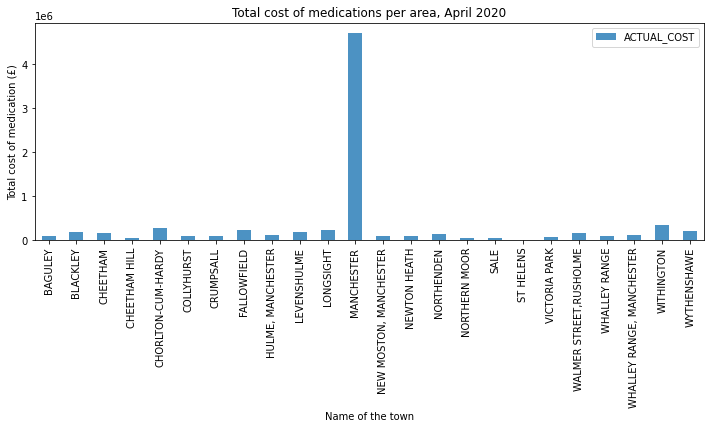

In [55]:
totalcost_region_20 = epd_20[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").sum()
totalcost_region_20

fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty matplotlib Figure and Axes
totalcost_region_20.plot.bar(ax=axs, alpha=0.8)            # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_ylabel("Total cost of medication (£)")  # Do any matplotlib customization you like
axs.set_xlabel("Name of the town")              # Do any matplotlib customization you like
axs.set_title ("Total cost of medications per area, April 2020") 
fig.savefig("TotalCost.png")           # Save the Figure/Axes using the existing matplotlib method.

In [56]:
AC_region_20 = epd_20[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").mean()
AC_region_20

,ACTUAL_COST
ADDRESS_3,
BAGULEY,30.515047
BLACKLEY,47.696880
CHEETHAM,42.966009
CHEETHAM HILL,29.544857
CHORLTON-CUM-HARDY,41.741249
COLLYHURST,34.195021
CRUMPSALL,34.828194
FALLOWFIELD,33.743663
"HULME, MANCHESTER",36.503148


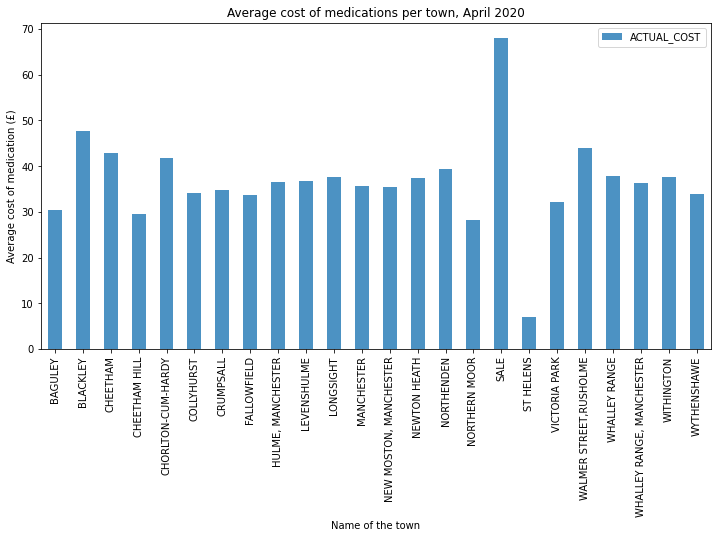

In [57]:
fig, axs = plt.subplots(figsize=(12, 6))        
AC_region_20.plot.bar(ax=axs, alpha=0.8)           
axs.set_ylabel("Average cost of medication (£)")  
axs.set_xlabel("Name of the town")              
axs.set_title ("Average cost of medications per town, April 2020") 
fig.savefig("AverageCost.png")

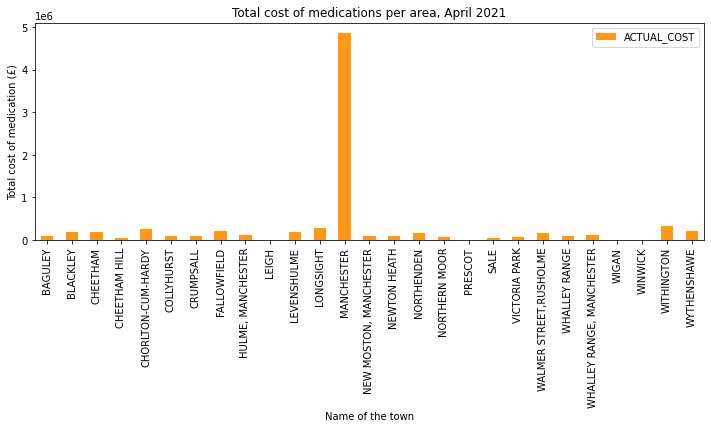

In [58]:
totalcost_region_21 = epd_21[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").sum()
totalcost_region_21

fig, axs = plt.subplots(figsize=(12, 4))        
totalcost_region_21.plot.bar(ax=axs, color = "darkorange", alpha=0.9)            
axs.set_ylabel("Total cost of medication (£)")  
axs.set_xlabel("Name of the town")             
axs.set_title ("Total cost of medications per area, April 2021") 
fig.savefig("TotalCost21.png")          

In [59]:
AC_region_21 = epd_21[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").mean()
AC_region_21

,ACTUAL_COST
ADDRESS_3,
BAGULEY,31.323280
BLACKLEY,46.804597
CHEETHAM,46.155806
CHEETHAM HILL,32.159463
CHORLTON-CUM-HARDY,41.738440
COLLYHURST,35.818607
CRUMPSALL,34.363240
FALLOWFIELD,31.825253
"HULME, MANCHESTER",43.375427


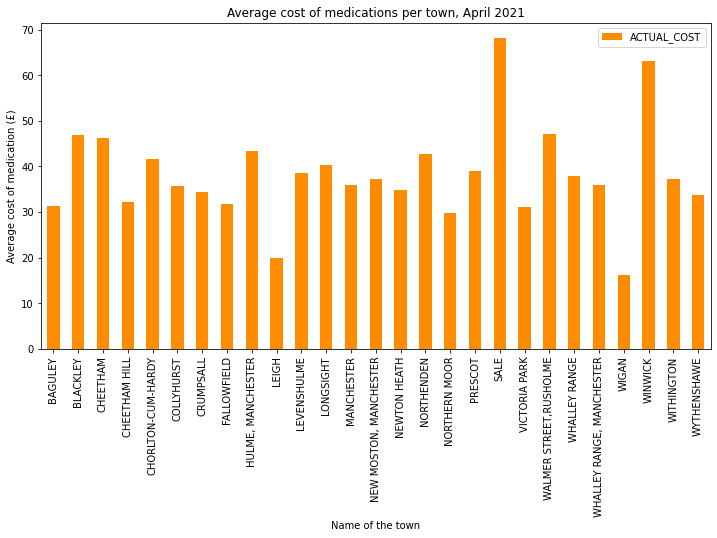

In [60]:
#AC_region_21.plot.bar()

fig, axs = plt.subplots(figsize=(12, 6))        
AC_region_21.plot.bar(ax=axs, color = "darkorange", alpha=1)           
axs.set_ylabel("Average cost of medication (£)")  
axs.set_xlabel("Name of the town")              
axs.set_title ("Average cost of medications per town, April 2021") 
fig.savefig("AverageCost.png")

In [61]:
AC_dataframe = pd.DataFrame(
    {
        "Regions": ["BAGULEY", "BLACKLEY", "CHEETHAM", "CHEETHAM HILL", "CHORLTON-CUM-HARDY", "COLLYHURST", 
                    "CRUMPSALL", "FALLOWFIELD", "HULME, MANCHESTER", "LEIGH", "LEVENSHULME", "LONGSIGHT", "MANCHESTER", 
                    "NEW MOSTON, MANCHESTER", "NEWTON HEATH", "NORTHENDEN", "NORTHERN MOOR", "PRESCOT", "SALE", "ST HELENS",
                    "VICTORIA PARK", "WALMER STREET,RUSHOLME", "WHALLEY RANGE", "WHALLEY RANGE, MANCHESTER", 
                    "WIGAN", "WINWICK", "WITHINGTON", "WYTHENSHAWE"], 
        "Actual cost_2020": [30.515047, 47.696880, 42.966009, 29.544857, 41.741249, 34.195021, 34.828194, 
                        33.743663, 36.503148, 0, 36.772451, 37.535127, 35.684338, 35.539066,
                        37.395882, 39.349025, 28.302254, 0, 67.953263, 6.939380, 32.111640, 44.068945, 37.759497,
                        36.236198, 0, 0, 37.684622, 33.952535],
        "Actual cost_2021": [31.323280, 46.804597, 46.155806, 32.159463, 41.738440, 35.818607, 34.363240, 31.825253,
                            43.375427, 19.957160, 38.560004, 40.258807, 35.851240, 37.281809, 34.755992, 42.792304,
                            29.891074, 39.023473, 68.059648, 0, 31.186714, 47.210340, 37.971424, 36.034304, 16.168987,
                            63.037214, 37.256295, 33.697139]
    }
)
AC_dataframe

,Regions,Actual cost_2020,Actual cost_2021
0,BAGULEY,30.515047,31.323280
1,BLACKLEY,47.696880,46.804597
2,CHEETHAM,42.966009,46.155806
3,CHEETHAM HILL,29.544857,32.159463
4,CHORLTON-CUM-HARDY,41.741249,41.738440
5,COLLYHURST,34.195021,35.818607
6,CRUMPSALL,34.828194,34.363240
7,FALLOWFIELD,33.743663,31.825253
8,"HULME, MANCHESTER",36.503148,43.375427
9,LEIGH,0.000000,19.957160


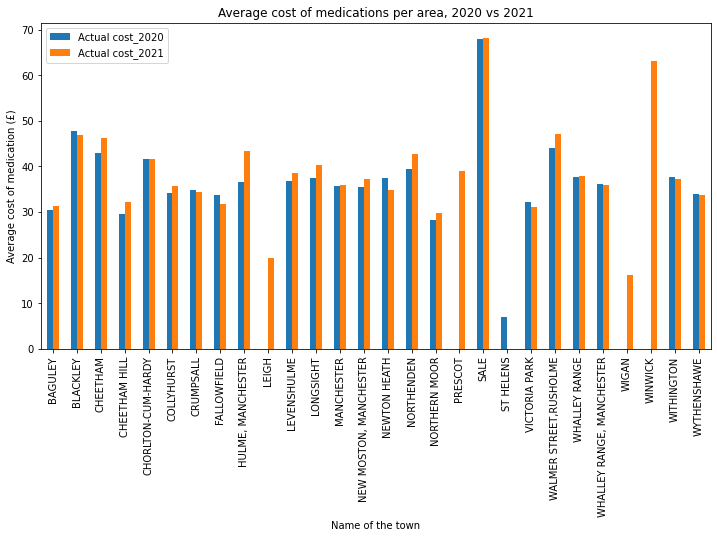

In [62]:
fig, axs = plt.subplots(figsize=(12, 6)) 
AC_dataframe.plot.bar(ax=axs, x="Regions")
 
axs.set_ylabel("Average cost of medication (£)") 
axs.set_xlabel("Name of the town")              
axs.set_title ("Average cost of medications per area, 2020 vs 2021") 
fig.savefig("MeanCost20_21.png")           

In [63]:
print(Regions_central["ACTUAL_COST"].mean())
print(Regions_north["ACTUAL_COST"].mean())
print(Regions_west["ACTUAL_COST"].mean())
print(Regions_SW["ACTUAL_COST"].mean())
print(Regions_south["ACTUAL_COST"].mean())
print(Regions_SE["ACTUAL_COST"].mean())
print(Regions_NE["ACTUAL_COST"].mean())


35.68433813886316
37.465318914984664
6.93938
43.91136301726565
36.56233428593302
35.4441553913206
40.61503796178325


In [64]:
print(Regions_central21["ACTUAL_COST"].mean())
print(Regions_north21["ACTUAL_COST"].mean())
print(Regions_west21["ACTUAL_COST"].mean())
print(Regions_SW21["ACTUAL_COST"].mean())
print(Regions_south21["ACTUAL_COST"].mean())
print(Regions_SE21["ACTUAL_COST"].mean())
print(Regions_NE21["ACTUAL_COST"].mean())
print(Regions_NW21["ACTUAL_COST"].mean())

35.8512395117746
38.07883632042695
31.126062666666655
36.78228255708407
37.86585153437356
36.0463411079942
39.99356533503501
16.16898742574258


,Regions,Actual cost 2020,Actual cost 2021
0,CENTRAL,35.684338,35.851240
1,NORTH,37.465319,38.078836
2,WEST,6.939380,19.957160
3,SW,43.911363,36.782283
4,SOUTH,36.562334,37.865852
5,SE,35.444155,36.046341
6,NE,40.615038,39.993565
7,NW,0.000000,16.168987


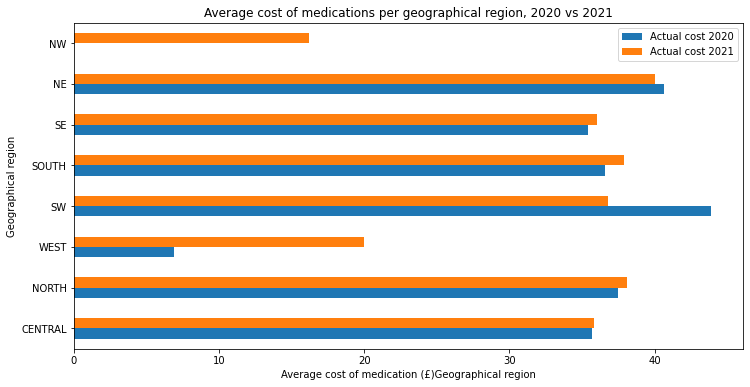

In [65]:
#Another way of creating a dataframe

import pandas as pd

Geogr_Regions = ["CENTRAL",
            "NORTH",
            "WEST",
            "SW",
            "SOUTH",
            "SE",
            "NE",
            "NW",]
mean_actual_cost_2020 = [35.68433813886316,
37.465318914984664,
6.93938,
43.91136301726565,
36.56233428593302,
35.4441553913206,
40.61503796178325, 0]
mean_actual_cost_2021 = [35.8512395117746,
38.07883632042695,
19.957159800000014,
36.78228255708407,
37.86585153437356,
36.0463411079942,
39.99356533503501,
16.16898742574258]

data = {'Regions': Geogr_Regions,
       'Actual cost 2020': mean_actual_cost_2020,
       'Actual cost 2021': mean_actual_cost_2021,
       }

# Creating the Datafame from dict:
df = pd.DataFrame(data)
display(df)

fig, axs = plt.subplots(figsize=(12, 6)) 
df.plot.barh(ax=axs, x="Regions")
axs.set_ylabel("Geographical region") 
axs.set_xlabel("Average cost of medication (£)""Geographical region")              
axs.set_title ("Average cost of medications per geographical region, 2020 vs 2021") 
fig.savefig("MeanCost20_21_region.png") 


In [66]:
print(Regions_central["ACTUAL_COST"].sum())
print(Regions_north["ACTUAL_COST"].sum())
print(Regions_west["ACTUAL_COST"].sum())
print(Regions_SW["ACTUAL_COST"].sum())
print(Regions_south["ACTUAL_COST"].sum())
print(Regions_SE["ACTUAL_COST"].sum())
print(Regions_NE["ACTUAL_COST"].sum())

4717041.2899
306278.98212999996
20.81814
310277.69108
1193540.8404299999
727774.84265
376217.09664


In [67]:
print(Regions_central21["ACTUAL_COST"].sum())
print(Regions_north21["ACTUAL_COST"].sum())
print(Regions_west21["ACTUAL_COST"].sum())
print(Regions_SW21["ACTUAL_COST"].sum())
print(Regions_south21["ACTUAL_COST"].sum())
print(Regions_SE21["ACTUAL_COST"].sum())
print(Regions_NE21["ACTUAL_COST"].sum())
print(Regions_NW21["ACTUAL_COST"].sum())

4865586.82158
306839.26307
4202.01846
259351.87431
1239841.57679
771031.2363
376019.50127999997
3266.13546


# CONCLUSIONS
After analysing this dataset by regions we can conclude that: a) The geographical areas included in the database for April 2020 and April 2021 are not exactly the same. In 2020 St Helen was included, while not in 2021. In 2021, Prescot, Wigan, Winwick and Leigh where added. This information is important to be taken into consideration when comparing the data of one year with the other. b) The central region has the highest number of practices and reasonably the highest number of prescriptions done during both years and the highest total money spent in medications (actual_cost sum). d) However, the mean actual cost (the average money spent) per medication was lower than other regions (such as North, SW and NE) c)The town with the highest mean actual cost on both periods of time analised, was SALE.


